In [345]:
#import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
import os
import warnings
warnings.filterwarnings('ignore')

In [346]:
#read csv
cvd_df = pd.read_csv('../data/cvd_data_cleaned.csv')

In [347]:
#group by target and get means for continuous variables
cvd_df_grouped = cvd_df.groupby('CVD_risk')[['age', 'sysbp', 'diabp', 'bmi', 'waistcircum',
                                   'hdl', 'trigly', 'ldl', 'totchol']].mean().reset_index()
cvd_df_grouped

,CVD_risk,age,sysbp,diabp,bmi,waistcircum,hdl,trigly,ldl,totchol
0,0,47.575478,122.651033,69.533313,28.803735,98.134353,55.004581,118.645442,115.465057,194.199177
1,1,66.504655,130.988206,66.692737,30.277542,105.086654,51.547486,131.177529,100.983240,178.771570


In [348]:
#def a function to plot barplots for the mean of grouped features
def barplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        barlist=ax.bar(x = 'CVD_risk', height = col, data=cvd_df_grouped)
        barlist[0].set_color('forestgreen')
        barlist[1].set_color('darkred')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'])
        ax.set_xlabel('CVD risk',fontsize=12, color='black')
        ax.set_ylabel(col, fontsize=12, color='black')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [349]:
features = [i for i in cvd_df_grouped.columns if i not in ['CVD_risk']]

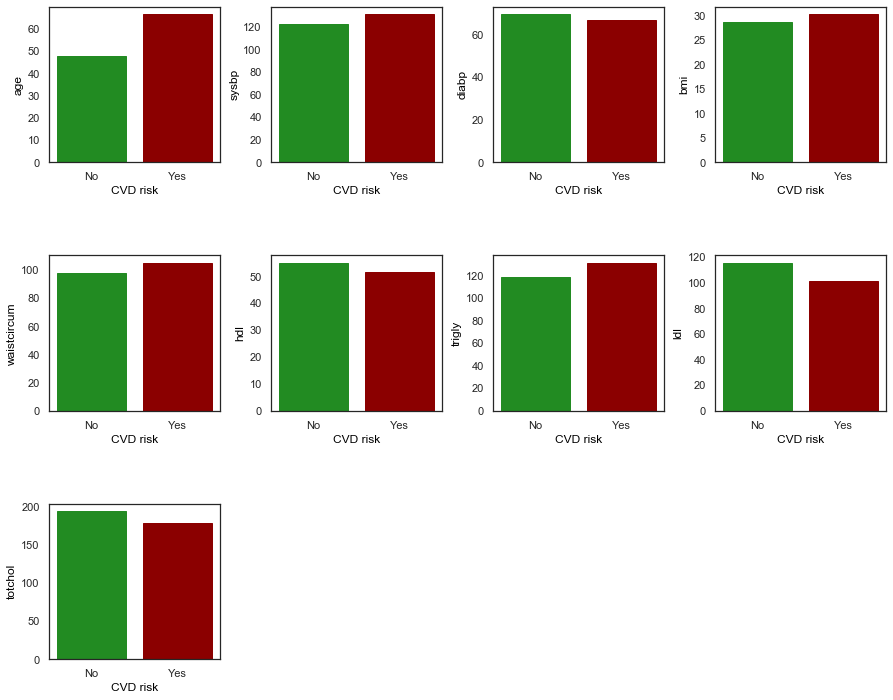

In [350]:
barplots(features, ncol=4, figsize=(15, 12))

In [351]:
def boxplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        barlist=ax.boxplot(x=col, data=cvd_df)
        ax.set(xlabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [352]:
features = [i for i in cvd_df.columns if i in ['age', 'sysbp', 'diabp', 'bmi', 'waistcircum',
                                   'hdl', 'trigly', 'ldl', 'totchol']]

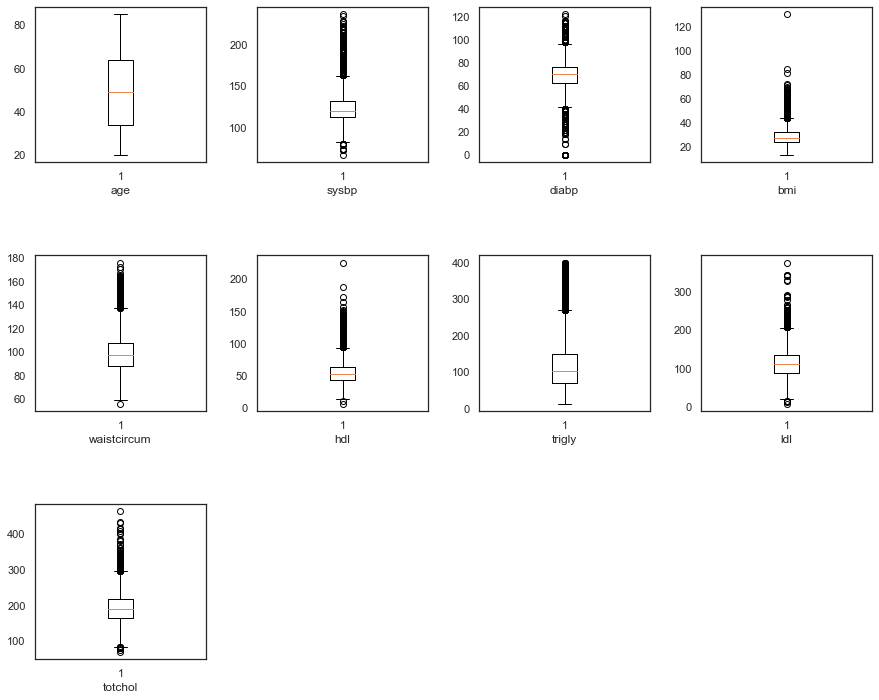

In [232]:
boxplots(features, ncol=4, figsize=(15, 12))

In [233]:
cvd_df.melt(id_vars='age', value_vars=['sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol'])

,age,variable,value
0,44,sysbp,144.0
1,70,sysbp,138.0
2,73,sysbp,130.0
3,79,sysbp,144.0
4,59,sysbp,136.0
...,...,...,...
115907,39,totchol,191.0
115908,34,totchol,178.0
115909,69,totchol,167.0
115910,76,totchol,140.0


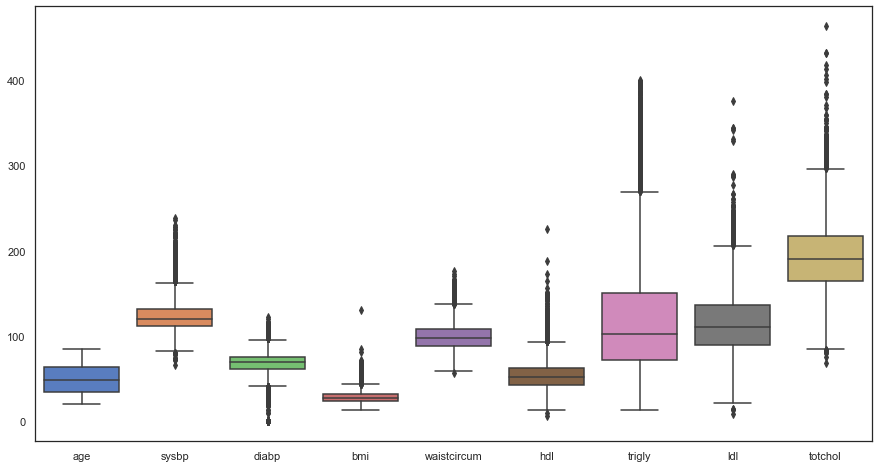

In [234]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=cvd_df[['age', 'sysbp', 'diabp', 'bmi', 'waistcircum',
                                   'hdl', 'trigly', 'ldl', 'totchol']])
plt.show()

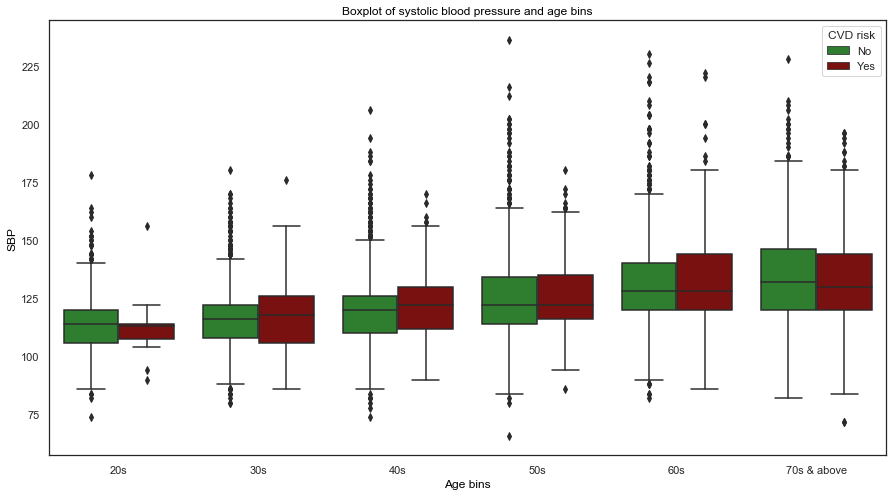

In [322]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x='age_cat', y = 'sysbp', hue= 'CVD_risk', data=cvd_df, palette=['forestgreen', 'darkred'])
ax.set_xlabel('Age bins',fontsize=12, color='black')
ax.set_ylabel('SBP', fontsize=12, color='black')
ax.set_title('Boxplot of systolic blood pressure and age bins', fontsize=12, color='black')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], 
          title='CVD risk')
plt.show()

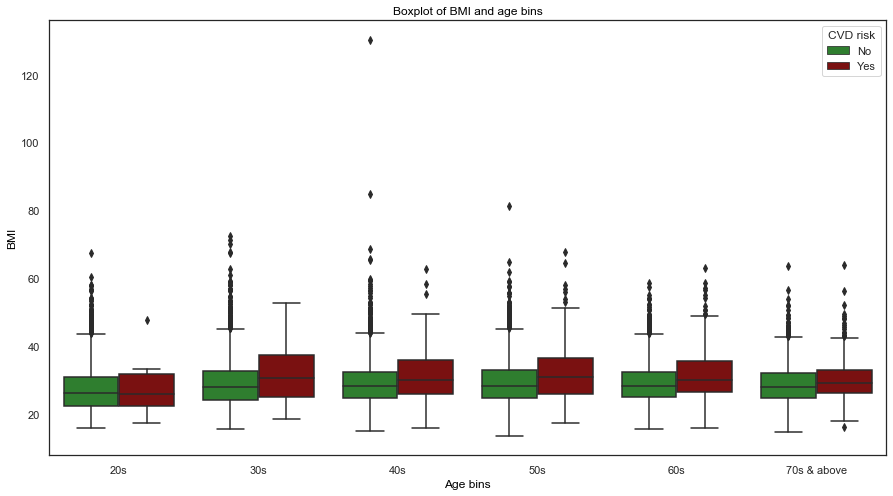

In [356]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x='age_cat', y = 'bmi', hue= 'CVD_risk', data=cvd_df, palette=['forestgreen', 'darkred'])
ax.set_xlabel('Age bins',fontsize=12, color='black')
ax.set_ylabel('BMI', fontsize=12, color='black')
ax.set_title('Boxplot of BMI and age bins', fontsize=12, color='black')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], 
          title='CVD risk')
plt.show()

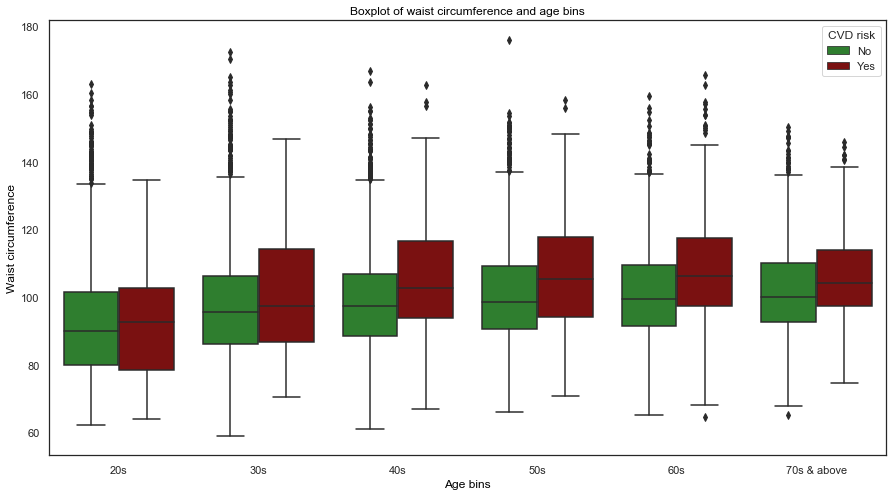

In [357]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x='age_cat', y = 'waistcircum', hue= 'CVD_risk', data=cvd_df, palette=['forestgreen', 'darkred'])
ax.set_xlabel('Age bins',fontsize=12, color='black')
ax.set_ylabel('Waist circumference', fontsize=12, color='black')
ax.set_title('Boxplot of waist circumference and age bins', fontsize=12, color='black')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], 
          title='CVD risk')
plt.show()

In [358]:
cvd_df['gender_cat']=cvd_df['gender'].replace({0: 'Male', 1: 'Female'})

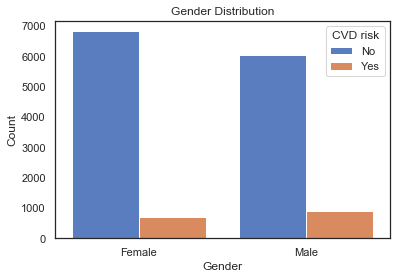

In [359]:
ax=sns.countplot(x='gender_cat', hue='CVD_risk', data=cvd_df)
ax.set_title('Gender Distribution')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')
plt.show()

In [360]:
def relative_risk(cvd_df, col, *categories):
    risk_ratio=[]
    for i in range(len(categories)):
        risk = len(cvd_df[(cvd_df['CVD_risk'] == 1) & (cvd_df[col] == categories[i])])/len(cvd_df[cvd_df[col] == categories[i]])
        risk_ratio.append(risk)
    return risk_ratio

In [361]:
CVD_risk_gender = relative_risk(cvd_df, 'gender_cat','Male', 'Female')
print('The percentage of males with CVD_risk is {:.2%}'. format(CVD_risk_gender[0]))
print('The percentage of females with CVD_risk is {:.2%}'. format(CVD_risk_gender[1]))

The percentage of males with CVD_risk is 12.93%
The percentage of females with CVD_risk is 9.45%


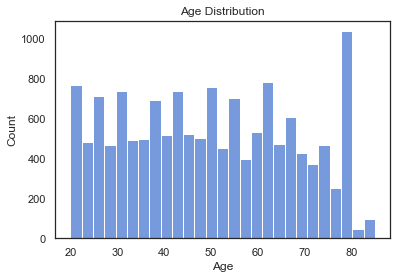

In [362]:
ax=sns.histplot(cvd_df['age'],kde = False)
ax.set_title('Age Distribution')
ax.set_xlabel("Age")
plt.show()

In [363]:
cvd_df['age_cat'] = pd.cut(x=cvd_df['age'], bins=[20, 29, 39, 49, 59, 69, 79],
                       labels=['20s', '30s', '40s', '50s', '60s', '70s & above'])

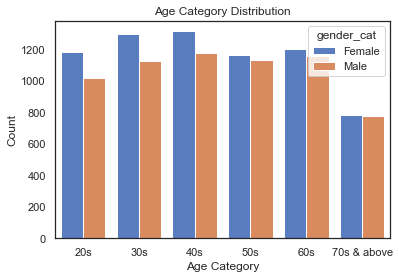

In [364]:
ax=sns.countplot(x='age_cat',data=cvd_df, hue='gender_cat')
ax.set_title('Age Category Distribution')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
plt.show()

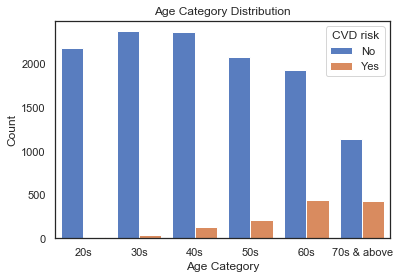

In [365]:
ax=sns.countplot(x='age_cat',data=cvd_df, hue='CVD_risk')
ax.set_title('Age Category Distribution')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')
plt.show()

In [366]:
cvd_df.groupby('age_cat')['sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol'].mean().T

age_cat,20s,30s,40s,50s,60s,70s & above
sysbp,113.949955,116.150538,119.873092,125.182056,130.792213,133.933248
diabp,65.296633,70.474773,73.078715,73.111498,70.107490,65.111682
bmi,27.510742,29.255227,29.507165,29.782230,29.676678,29.171900
waistcircum,92.629345,97.619396,99.097992,101.124042,102.440542,102.931579
hdl,53.871247,52.979735,54.016466,54.872387,55.553534,55.770218
trigly,105.768881,116.581059,121.826104,128.749129,125.058824,126.576380
ldl,104.050500,114.820099,119.703213,123.609756,115.182395,108.704108
totchol,179.074158,191.111249,198.087149,204.237369,195.754549,189.779846


In [367]:
CVD_risk_age = relative_risk(cvd_df, 'age_cat','20s', '30s', '40s', '50s', '60s', '70s & above')
print('The percentage of individuals in 20s with CVD_risk is {:.2%}'. format(CVD_risk_age[0]))
print('The percentage of individuals in 30s with CVD_risk is {:.2%}'. format(CVD_risk_age[1]))
print('The percentage of individuals in 40s with CVD_risk is {:.2%}'. format(CVD_risk_age[2]))
print('The percentage of individuals in 50s with CVD_risk is {:.2%}'. format(CVD_risk_age[3]))
print('The percentage of individuals in 60s with CVD_risk is {:.2%}'. format(CVD_risk_age[4]))
print('The percentage of individuals in 70s and above with CVD_risk is {:.2%}'. format(CVD_risk_age[5]))

The percentage of individuals in 20s with CVD_risk is 0.73%
The percentage of individuals in 30s with CVD_risk is 1.74%
The percentage of individuals in 40s with CVD_risk is 5.10%
The percentage of individuals in 50s with CVD_risk is 9.19%
The percentage of individuals in 60s with CVD_risk is 18.49%
The percentage of individuals in 70s and above with CVD_risk is 27.09%


In [368]:
cvd_df['ethnicity_cat']=cvd_df['ethnicity'].replace({1.0: 'Mexican', 2.0: 'Hispanic',
                                         3.0: 'White', 4.0: 'Black',
                                         5.0:'Other'})

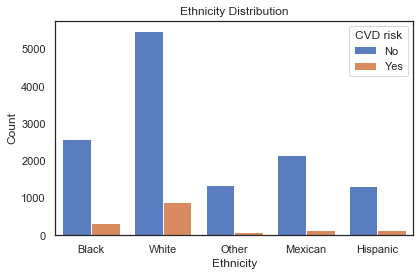

In [369]:
ax=sns.countplot(x='ethnicity_cat',hue='CVD_risk', data=cvd_df)
ax.set_title('Ethnicity Distribution')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Count')
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')
plt.tight_layout()

In [370]:
CVD_risk_ethnicity = relative_risk(cvd_df, 'ethnicity_cat','Black', 'White', 'Mexican', 'Hispanic', 'Other')
print('The percentage of Blacks with CVD_risk is {:.2%}'. format(CVD_risk_ethnicity[0]))
print('The percentage of Whites with CVD_risk is {:.2%}'. format(CVD_risk_ethnicity[1]))
print('The percentage of Mexicans with CVD_risk is {:.2%}'. format(CVD_risk_ethnicity[2]))
print('The percentage of Hispanics with CVD_risk is {:.2%}'. format(CVD_risk_ethnicity[3]))
print('The percentage of Others with CVD_risk is {:.2%}'. format(CVD_risk_ethnicity[4]))

The percentage of Blacks with CVD_risk is 11.69%
The percentage of Whites with CVD_risk is 14.03%
The percentage of Mexicans with CVD_risk is 6.68%
The percentage of Hispanics with CVD_risk is 9.15%
The percentage of Others with CVD_risk is 6.18%


In [371]:
def income_cat(income):
    if ((income == 1) or (income == 2)
       or (income == 3) or (income == 4)
       or (income == 5)):
        return 'lowest'
    elif ((income == 6) or (income == 7)
          or (income == 8) or (income == 9)
         or (income == 10)):
        return 'lower middle'
    else:
        return 'middle & over'

In [245]:
cvd_df['income_cat'] = cvd_df.apply(lambda x : income_cat(x['income']), axis=1)

In [246]:
cvd_df['income_cat'].value_counts(normalize=True)

lower middle     0.454000
lowest           0.326455
middle & over    0.219546
Name: income_cat, dtype: float64

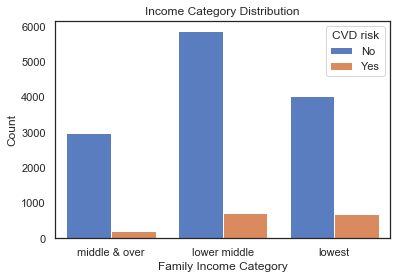

In [247]:
ax=sns.countplot(x='income_cat',hue='CVD_risk', data=cvd_df)
ax.set_title('Income Category Distribution')
ax.set_xlabel('Family Income Category')
ax.set_ylabel('Count')
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')
plt.show()

In [248]:
cvd_df.groupby('income_cat')['sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol'].mean().T

income_cat,lower middle,lowest,middle & over
sysbp,124.044086,125.057082,120.414964
diabp,69.289450,68.289218,70.448915
bmi,29.245079,29.076499,28.231892
waistcircum,99.540818,99.149239,97.237787
hdl,54.317574,53.616279,56.738761
trigly,120.722256,123.893023,112.894687
ldl,114.169504,112.574630,115.107828
totchol,192.630131,190.973362,194.427224


In [249]:
CVD_risk_income = relative_risk(cvd_df, 'income_cat','lowest', 'lower middle', 'middle & over')
print('The percentage of individuals in lowest income class with CVD_risk is {:.2%}'. format(CVD_risk_income[0]))
print('The percentage of individuals in lower middle income class with CVD_risk is {:.2%}'. format(CVD_risk_income[1]))
print('The percentage of individuals in middle and over income class with CVD_risk is {:.2%}'. format(CVD_risk_income[2]))

The percentage of individuals in lowest income class with CVD_risk is 14.74%
The percentage of individuals in lower middle income class with CVD_risk is 10.87%
The percentage of individuals in middle and over income class with CVD_risk is 6.26%


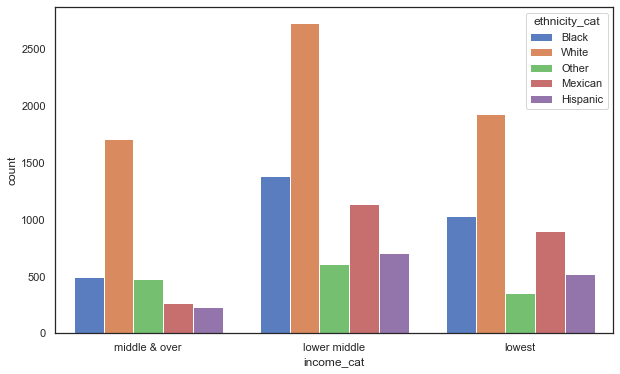

In [250]:
plt.figure(figsize=(10,6))
sns.countplot(x='income_cat', hue='ethnicity_cat', data=cvd_df)

In [251]:
def pulse_cat(puls):
    if puls==2.0:
        return 1
    else:
        return 0

In [252]:
cvd_df['pulse_cat'] = cvd_df.apply(lambda x: pulse_cat(x['pulse_regular']), axis=1)

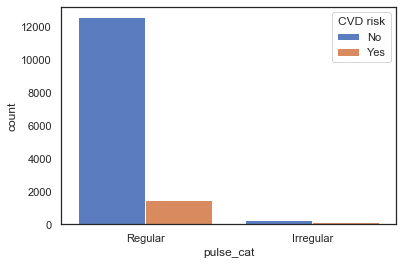

In [253]:
sns.countplot(x='pulse_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Regular', 'Irregular'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [254]:
CVD_risk_pulse = relative_risk(cvd_df, 'pulse_cat', 1, 0)
print('The percentage of individuals with irregular pulse with CVD_risk is {:.2%}'. format(CVD_risk_pulse[0]))
print('The percentage of individuals with regular pulse of heart diseases with CVD_risk is {:.2%}'. format(CVD_risk_pulse[1]))

The percentage of individuals with irregular pulse with CVD_risk is 31.87%
The percentage of individuals with regular pulse of heart diseases with CVD_risk is 10.51%


In [255]:
def hyper(sbp, dbp):
    if ((sbp <= 130) and (dbp <= 80)):    
        return 0
    else:
        return 1

In [256]:
cvd_df['hypertension_cat'] = cvd_df.apply(lambda x : hyper(x['sysbp'], x['diabp']), axis=1)

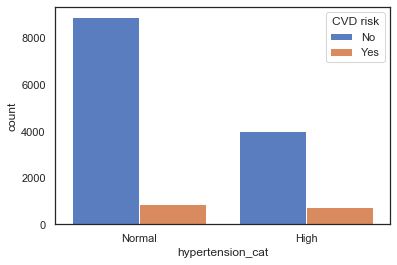

In [257]:
sns.countplot(x='hypertension_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'High'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [258]:
CVD_risk_hypertension = relative_risk(cvd_df, 'hypertension_cat', 1, 0)
print('The percentage of hypertensive individuals with CVD_risk is {:.2%}'. format(CVD_risk_hypertension[0]))
print('The percentage of non-hypertensive individuals with CVD_risk is {:.2%}'. format(CVD_risk_hypertension[1]))

The percentage of hypertensive individuals with CVD_risk is 15.98%
The percentage of non-hypertensive individuals with CVD_risk is 8.75%


In [259]:
cvd_df['bmi_cat'] = pd.cut(x=cvd_df['bmi'], bins=[0, 18.5, 24.9, 'inf'],
                       labels=['underweight', 'ideal', 'overweight'])

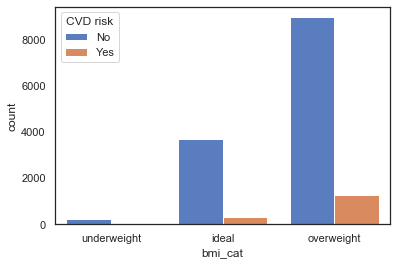

In [260]:
sns.countplot(x='bmi_cat', hue='CVD_risk', data=cvd_df)
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [261]:
CVD_risk_weight = relative_risk(cvd_df, 'bmi_cat', 'underweight', 'ideal', 'overweight')
print('The percentage of underweight individuals with CVD_risk is {:.2%}'. format(CVD_risk_weight[0]))
print('The percentage of ideal weight individuals with CVD_risk is {:.2%}'. format(CVD_risk_weight[1]))
print('The percentage of overweight individuals with CVD_risk is {:.2%}'. format(CVD_risk_weight[2]))

The percentage of underweight individuals with CVD_risk is 8.43%
The percentage of ideal weight individuals with CVD_risk is 7.95%
The percentage of overweight individuals with CVD_risk is 12.43%


In [262]:
def waist_cat(gender,waist):
    if ((gender == 0 and waist < 102) or (gender == 1 and waist < 89)):
        return 0
    else:
        return 1

In [263]:
cvd_df['waistcircum_cat'] = cvd_df.apply(lambda x : waist_cat(x['gender'], x['waistcircum']), axis=1)

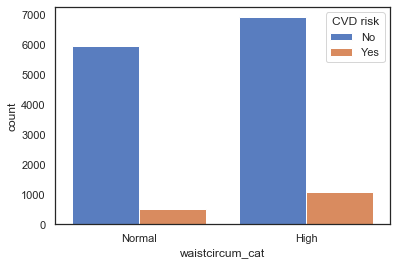

In [264]:
sns.countplot(x='waistcircum_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'High'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [265]:
CVD_risk_waist = relative_risk(cvd_df, 'waistcircum_cat', 1, 0)
print('The percentage of high waist circumference individuals with CVD_risk is {:.2%}'. format(CVD_risk_waist[0]))
print('The percentage of ideal waist circumference individuals with CVD_risk is {:.2%}'. format(CVD_risk_waist[1]))

The percentage of high waist circumference individuals with CVD_risk is 13.62%
The percentage of ideal waist circumference individuals with CVD_risk is 8.03%


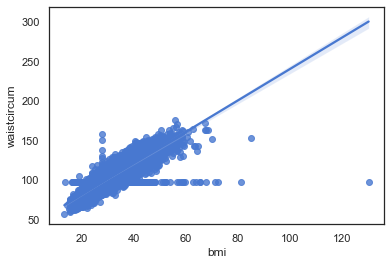

In [266]:
sns.regplot(x='bmi', y='waistcircum', data=cvd_df)

In [267]:
def hdl_cat(hdl):
    if hdl > 60:
        return 0
    else:
        return 1

In [268]:
cvd_df['hdl_cat'] = cvd_df.apply(lambda x : hdl_cat(x['hdl']), axis=1)

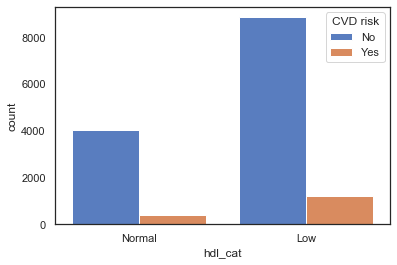

In [269]:
sns.countplot(x='hdl_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'Low'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [270]:
CVD_risk_hdl = relative_risk(cvd_df, 'hdl_cat', 0, 1)
print('The percentage of normal HDL levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_hdl[0]))
print('The percentage of low HDL levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_hdl[1]))

The percentage of normal HDL levels individuals with CVD_risk is 8.83%
The percentage of low HDL levels individuals with CVD_risk is 12.12%


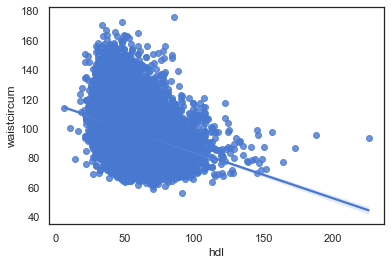

In [271]:
sns.regplot(x='hdl', y='waistcircum', data=cvd_df)

In [272]:
def trigly_cat(trigly):
    if trigly < 130:
        return 0
    else:
        return 1

In [273]:
cvd_df['trigly_cat'] = cvd_df.apply(lambda x : trigly_cat(x['trigly']), axis=1)

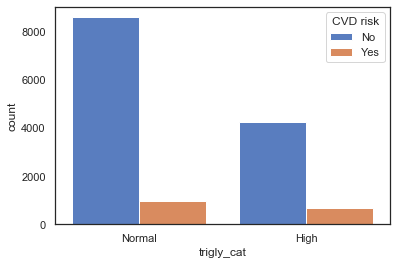

In [274]:
sns.countplot(x='trigly_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'High'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [275]:
CVD_risk_trigly = relative_risk(cvd_df, 'trigly_cat', 0, 1)
print('The percentage of normal triglyceride levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_trigly[0]))
print('The percentage of high triglyceride levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_trigly[1]))

The percentage of normal triglyceride levels individuals with CVD_risk is 9.94%
The percentage of high triglyceride levels individuals with CVD_risk is 13.41%


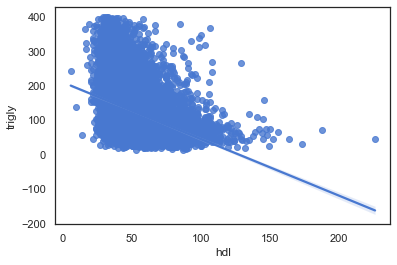

In [276]:
sns.regplot(x='hdl', y='trigly', data=cvd_df)

In [277]:
def ldl_cat(ldl):
    if ldl < 100:
        return 0
    else:
        return 1

In [278]:
cvd_df['ldl_cat'] = cvd_df.apply(lambda x : ldl_cat(x['ldl']), axis=1)

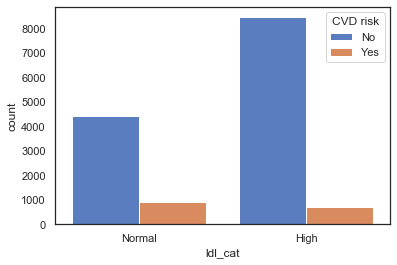

In [279]:
sns.countplot(x='ldl_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'High'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [280]:
CVD_risk_ldl = relative_risk(cvd_df, 'ldl_cat', 0, 1)
print('The percentage of normal ldl levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_ldl[0]))
print('The percentage of high ldl levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_ldl[1]))

The percentage of normal ldl levels individuals with CVD_risk is 16.86%
The percentage of high ldl levels individuals with CVD_risk is 7.79%


In [281]:
def totalchol_cat(chol):
    if chol < 200:
        return 0
    else:
        return 1

In [282]:
cvd_df['totchol_cat'] = cvd_df.apply(lambda x : totalchol_cat(x['totchol']), axis=1)

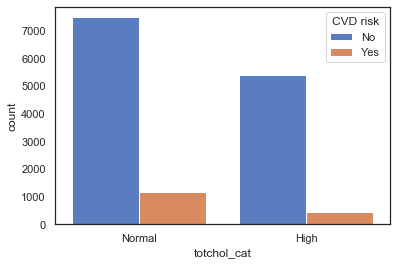

In [283]:
sns.countplot(x='totchol_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Normal', 'High'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [284]:
CVD_risk_chol = relative_risk(cvd_df, 'totchol_cat', 0, 1)
print('The percentage of normal total cholestrol levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_chol[0]))
print('The percentage of high total cholestrol levels individuals with CVD_risk is {:.2%}'. format(CVD_risk_chol[1]))

The percentage of normal total cholestrol levels individuals with CVD_risk is 13.46%
The percentage of high total cholestrol levels individuals with CVD_risk is 7.65%


In [285]:
def diab_cat(diab):
    if diab==1.0:
        return 1
    else:
        return 0

In [286]:
cvd_df['diabetes_cat'] = cvd_df.apply(lambda x: diab_cat(x['diabetes']), axis=1)

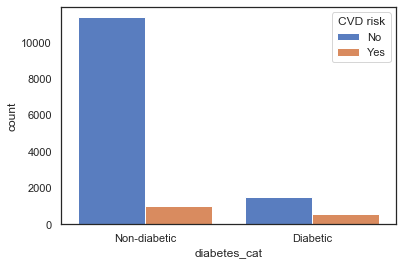

In [287]:
sns.countplot(x='diabetes_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Non-diabetic', 'Diabetic'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [288]:
CVD_risk_diabetes = relative_risk(cvd_df, 'diabetes_cat', 0, 1)
print('The percentage of non-diabetic individuals with CVD_risk is {:.2%}'. format(CVD_risk_diabetes[0]))
print('The percentage of diabetic individuals with CVD_risk is {:.2%}'. format(CVD_risk_diabetes[1]))

The percentage of non-diabetic individuals with CVD_risk is 8.29%
The percentage of diabetic individuals with CVD_risk is 27.96%


In [289]:
def kidn_cat(kidn):
    if kidn==1.0:
        return 1
    else:
        return 0

In [290]:
cvd_df['kidney_cat'] = cvd_df.apply(lambda x: kidn_cat(x['kidney_fail']), axis=1)

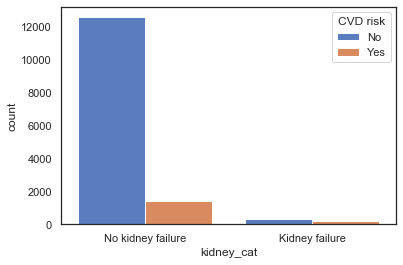

In [291]:
sns.countplot(x='kidney_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['No kidney failure', 'Kidney failure'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [292]:
CVD_risk_kidney = relative_risk(cvd_df, 'kidney_cat', 0, 1)
print('The percentage of normal kidney function individuals with CVD_risk is {:.2%}'. format(CVD_risk_kidney[0]))
print('The percentage of kidney failure individuals with CVD_risk is {:.2%}'. format(CVD_risk_kidney[1]))

The percentage of normal kidney function individuals with CVD_risk is 10.24%
The percentage of kidney failure individuals with CVD_risk is 37.72%


In [293]:
def famhis_cat(fam):
    if fam == 1.0:
        return 1
    else:
        return 0

In [294]:
cvd_df['family_history_cat'] = cvd_df.apply(lambda x: famhis_cat(x['fam_history']), axis=1)

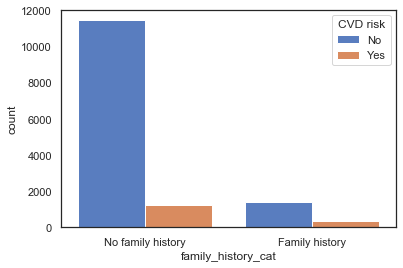

In [295]:
sns.countplot(x='family_history_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['No family history', 'Family history'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [296]:
CVD_risk_famhistory = relative_risk(cvd_df, 'family_history_cat', 0, 1)
print('The percentage of individuals with no family history of heart diseases with CVD_risk is {:.2%}'. format(CVD_risk_famhistory[0]))
print('The percentage of individuals with family history of heart diseases with CVD_risk is {:.2%}'. format(CVD_risk_famhistory[1]))

The percentage of individuals with no family history of heart diseases with CVD_risk is 9.86%
The percentage of individuals with family history of heart diseases with CVD_risk is 20.17%


In [297]:
def smoking_cat(smoker):
    if smoker == 1:
        return 1
    else:
        return 0

In [298]:
cvd_df['smoking_cat'] = cvd_df.apply(lambda x : smoking_cat(x['smoking']), axis=1)

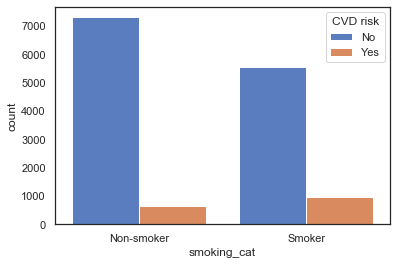

In [299]:
sns.countplot(x='smoking_cat', hue='CVD_risk', data=cvd_df)
plt.xticks([0,1], ['Non-smoker', 'Smoker'])
labels = ['No', 'Yes']
plt.legend(labels = labels, title = 'CVD risk')

In [300]:
CVD_risk_smoking = relative_risk(cvd_df, 'smoking_cat', 0, 1)
print('The percentage of non-smoking individuals with CVD_risk is {:.2%}'. format(CVD_risk_smoking[0]))
print('The percentage of smoking individuals with CVD_risk is {:.2%}'. format(CVD_risk_smoking[1]))

The percentage of non-smoking individuals with CVD_risk is 8.25%
The percentage of smoking individuals with CVD_risk is 14.63%


In [301]:
cvd_df.drop(['ethnicity', 'income', 'pulse_regular','diabetes', 'kidney_fail',
             'fam_history', 'smoking'], axis=1, inplace=True)
cvd_df.head().T

,0,1,2,3,4
gender,1,0,0,0,1
age,44,70,73,79,59
sysbp,144,138,130,144,136
diabp,74,60,68,74,76
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96,96.5,117.1,107.7,101.2
hdl,39,59,49,81,76
trigly,86,65,195,50,123
ldl,49,75,98,90,104
totchol,105,147,186,181,205


In [333]:
def kdeplot(col,label):
    ax=sns.kdeplot(data=cvd_df, x=col, hue="CVD_risk", multiple="stack", alpha =0.7, palette=['forestgreen', 'darkred'])
    ax.set_xlabel(label, color='black', fontsize=12)
    ax.set_ylabel('Density', color='black', fontsize=12)
    ax.legend(legend_labels, ['No', 'Yes'], title='CVD risk')
    plt.show()

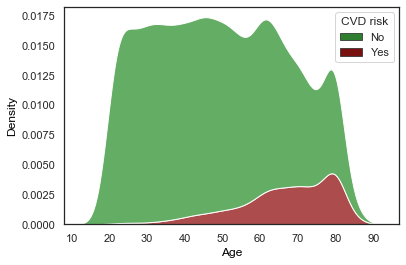

In [334]:
kdeplot('age', 'Age')

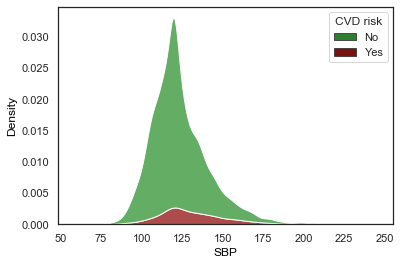

In [335]:
kdeplot('sysbp', 'SBP')

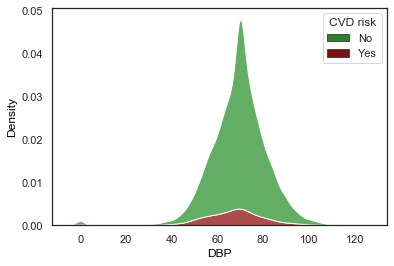

In [337]:
kdeplot('diabp', 'DBP')

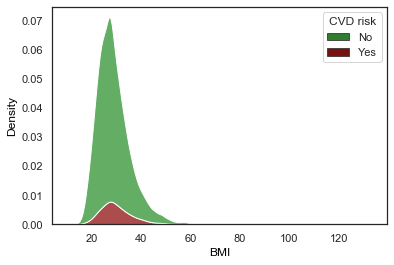

In [338]:
kdeplot('bmi', 'BMI')

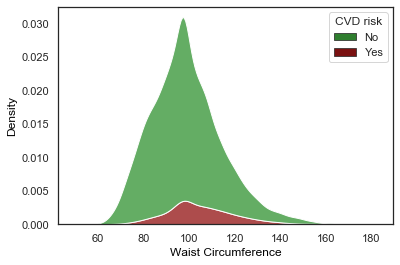

In [344]:
kdeplot('waistcircum', 'Waist Circumference')

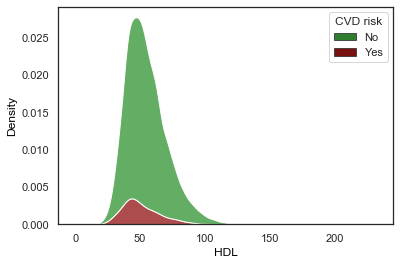

In [340]:
kdeplot('hdl', 'HDL')

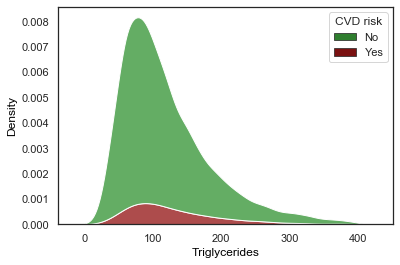

In [341]:
kdeplot('trigly', 'Triglycerides')

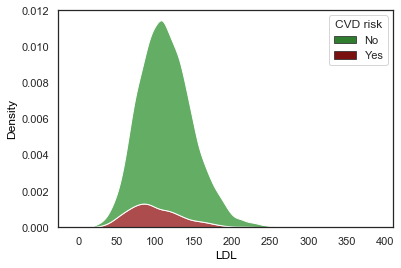

In [342]:
kdeplot('ldl', 'LDL')

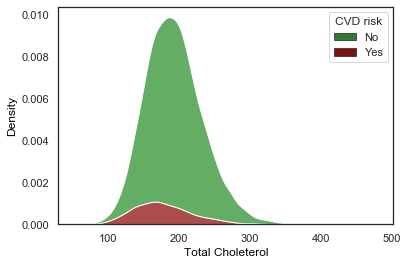

In [343]:
kdeplot('totchol', 'Total Choleterol')

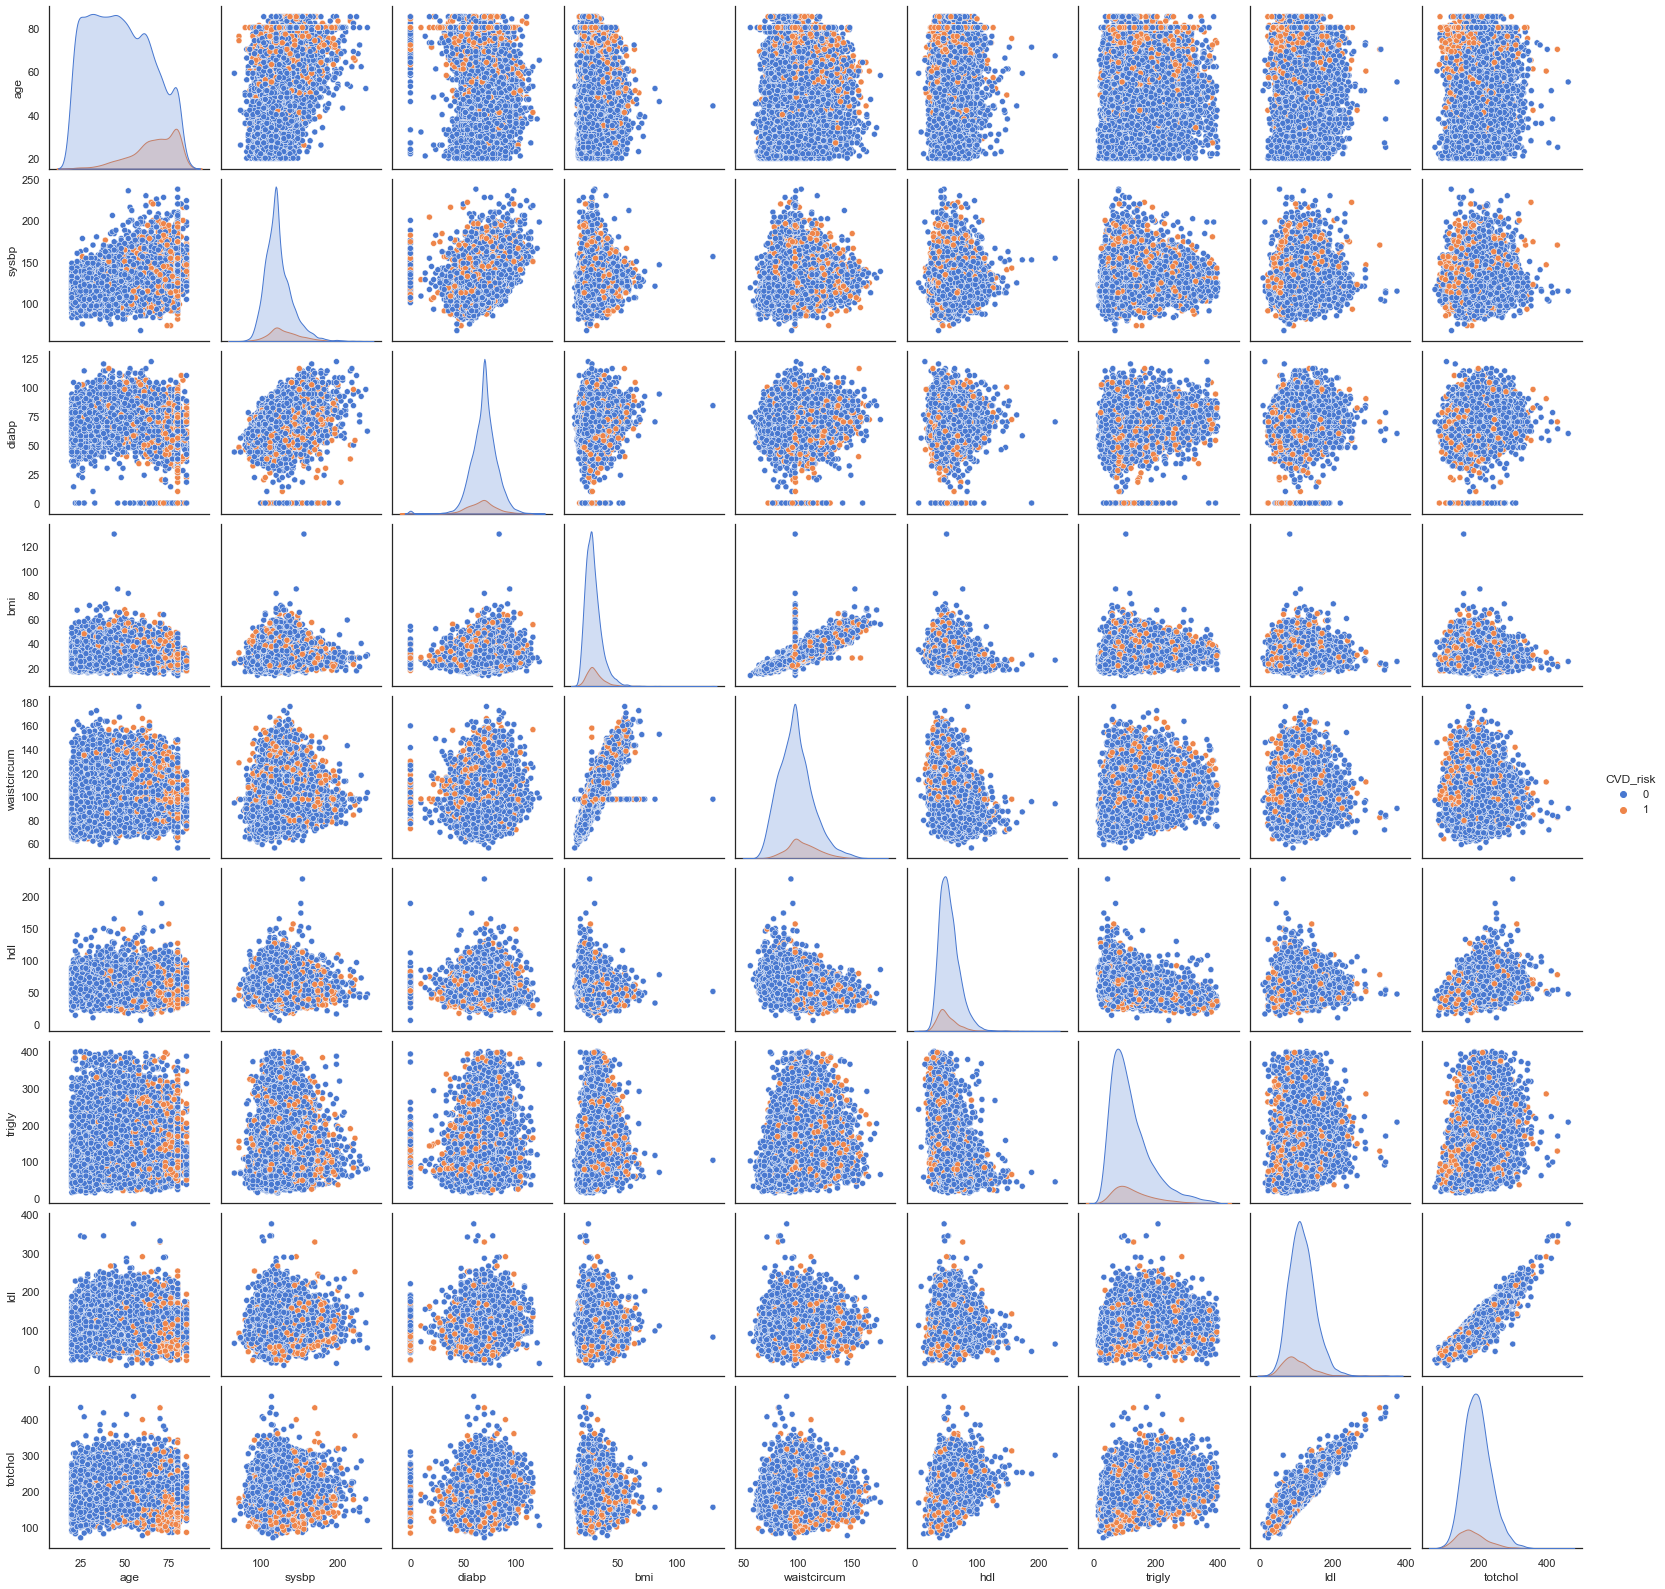

In [211]:
sns.pairplot(cvd_df, hue='CVD_risk', vars=['age', 'sysbp', 'diabp', 'bmi', 'waistcircum',
                                       'hdl', 'trigly', 'ldl', 'totchol'])

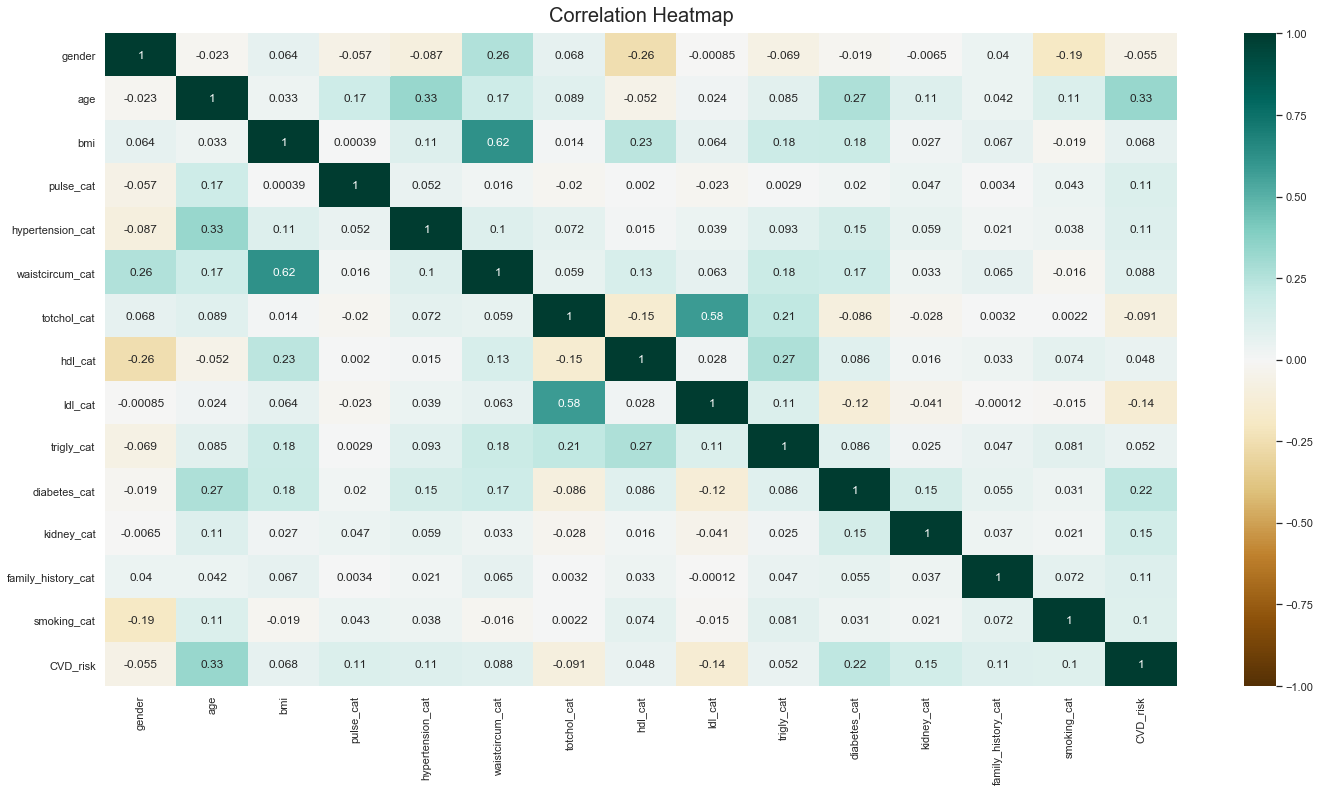

In [223]:
# Adding heatmaps
corr = cvd_df[['gender', 'age', 'bmi', 'pulse_cat', 'hypertension_cat',
           'waistcircum_cat', 'totchol_cat', 'hdl_cat', 'ldl_cat', 'trigly_cat',
           'diabetes_cat', 'kidney_cat', 'family_history_cat', 'smoking_cat', 'CVD_risk']].corr()
plt.figure(figsize=(24,12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [213]:
cvd_df_dummies = pd.get_dummies(cvd_df)

In [214]:
cvd_df_dummies.head().T

,0,1,2,3,4
gender,1.0,0.00,0.00,0.00,1.00
age,44.0,70.00,73.00,79.00,59.00
sysbp,144.0,138.00,130.00,144.00,136.00
diabp,74.0,60.00,68.00,74.00,76.00
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96.0,96.50,117.10,107.70,101.20
hdl,39.0,59.00,49.00,81.00,76.00
trigly,86.0,65.00,195.00,50.00,123.00
ldl,49.0,75.00,98.00,90.00,104.00
totchol,105.0,147.00,186.00,181.00,205.00


In [215]:
cvd_df_dummies.columns

Index(['gender', 'age', 'sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl',
       'trigly', 'ldl', 'totchol', 'CVD_risk', 'pulse_cat', 'hypertension_cat',
       'waistcircum_cat', 'hdl_cat', 'trigly_cat', 'ldl_cat', 'totchol_cat',
       'diabetes_cat', 'kidney_cat', 'family_history_cat', 'smoking_cat',
       'age_cat_20s', 'age_cat_30s', 'age_cat_40s', 'age_cat_50s',
       'age_cat_60s', 'age_cat_70s & above', 'gender_cat_Female',
       'gender_cat_Male', 'ethnicity_cat_Black', 'ethnicity_cat_Hispanic',
       'ethnicity_cat_Mexican', 'ethnicity_cat_Other', 'ethnicity_cat_White',
       'income_cat_lower middle', 'income_cat_lowest',
       'income_cat_middle & over', 'bmi_cat_underweight', 'bmi_cat_ideal',
       'bmi_cat_overweight'],
      dtype='object')

In [216]:
variables=['gender_cat_Female', 'gender_cat_Male', 'age_cat_20s',
           'age_cat_30s', 'age_cat_40s', 'age_cat_50s', 'age_cat_60s',
           'age_cat_70s & above', 'ethnicity_cat_Black', 'ethnicity_cat_Hispanic',
           'ethnicity_cat_Mexican', 'ethnicity_cat_Other', 'ethnicity_cat_White',
           'income_cat_lower middle', 'income_cat_lowest', 'income_cat_middle & over',
           'bmi_cat_underweight', 'bmi_cat_ideal', 'bmi_cat_overweight']
d = {'Variable':[],'Odds Ratio':[],'LCB':[],'UCB':[]}
for variable in variables:
    CTab=pd.crosstab(cvd_df_dummies[variable],cvd_df_dummies['CVD_risk'])
    Odds = sm.stats.Table2x2(CTab)
    d['Variable'].append(variable)
    d['Odds Ratio'].append(Odds.oddsratio)
    lcb,ucb = Odds.oddsratio_confint()
    d['LCB'].append(lcb)
    d['UCB'].append(ucb)

results = pd.DataFrame(d)
results.sort_values(by='Odds Ratio', ascending=False, inplace=True)
results.reset_index()

,index,Variable,Odds Ratio,LCB,UCB
0,7,age_cat_70s & above,3.668549,3.232116,4.163914
1,6,age_cat_60s,2.116657,1.877244,2.386603
2,12,ethnicity_cat_White,1.684869,1.518016,1.870061
3,14,income_cat_lowest,1.672462,1.505213,1.858294
4,18,bmi_cat_overweight,1.637643,1.444615,1.856464
5,1,gender_cat_Male,1.423234,1.282348,1.579599
6,8,ethnicity_cat_Black,1.073460,0.945210,1.219111
7,13,income_cat_lower middle,0.954785,0.860283,1.059669
8,9,ethnicity_cat_Hispanic,0.787734,0.654222,0.948492
9,5,age_cat_50s,0.780172,0.670061,0.908378


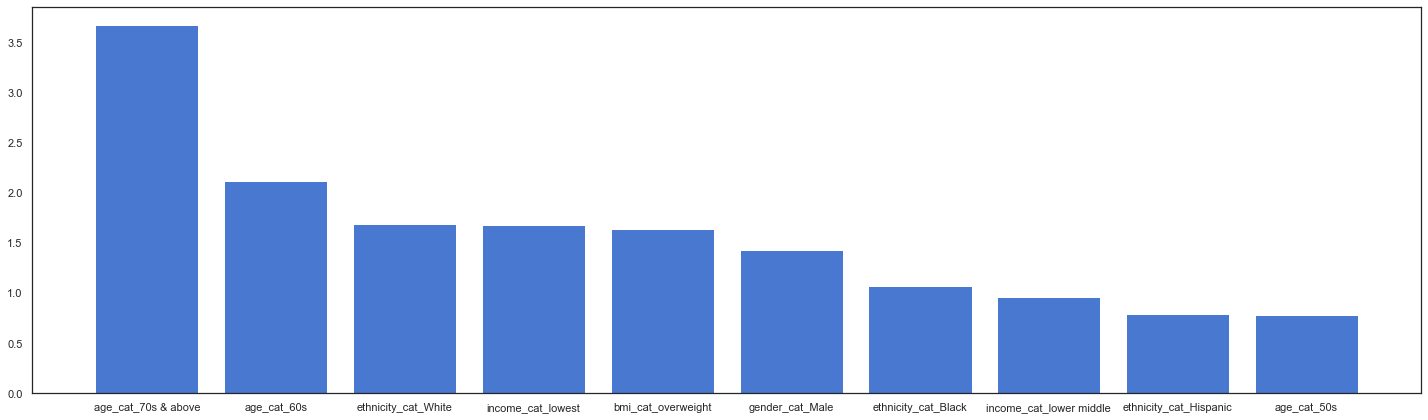

In [217]:
plt.figure(figsize=(20,6))
plt.bar(x='Variable',height='Odds Ratio', data=results.head(10))
plt.tight_layout()
plt.show()

In [218]:
cvd_df_dummies.head().T

,0,1,2,3,4
gender,1.0,0.00,0.00,0.00,1.00
age,44.0,70.00,73.00,79.00,59.00
sysbp,144.0,138.00,130.00,144.00,136.00
diabp,74.0,60.00,68.00,74.00,76.00
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96.0,96.50,117.10,107.70,101.20
hdl,39.0,59.00,49.00,81.00,76.00
trigly,86.0,65.00,195.00,50.00,123.00
ldl,49.0,75.00,98.00,90.00,104.00
totchol,105.0,147.00,186.00,181.00,205.00


In [184]:
datapath = '../data'
datapath_cvd_data = os.path.join(datapath, 'cvd_data_features.csv')
if not os.path.exists(datapath_cvd_data):
    cvd_df.to_csv(datapath_cvd_data, index=False)

In [185]:
datapath = '../data'
datapath_cvd_data = os.path.join(datapath, 'cvd_data_encoded.csv')
if not os.path.exists(datapath_cvd_data):
    cvd_df_dummies.to_csv(datapath_cvd_data, index=False)

In [186]:
cvd_df.head().T

,0,1,2,3,4
gender,1,0,0,0,1
age,44,70,73,79,59
sysbp,144,138,130,144,136
diabp,74,60,68,74,76
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96,96.5,117.1,107.7,101.2
hdl,39,59,49,81,76
trigly,86,65,195,50,123
ldl,49,75,98,90,104
totchol,105,147,186,181,205


In [187]:
cvd_df_dummies.head().T

,0,1,2,3,4
gender,1.0,0.00,0.00,0.00,1.00
age,44.0,70.00,73.00,79.00,59.00
sysbp,144.0,138.00,130.00,144.00,136.00
diabp,74.0,60.00,68.00,74.00,76.00
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96.0,96.50,117.10,107.70,101.20
hdl,39.0,59.00,49.00,81.00,76.00
trigly,86.0,65.00,195.00,50.00,123.00
ldl,49.0,75.00,98.00,90.00,104.00
totchol,105.0,147.00,186.00,181.00,205.00
